In [1]:
from backtester import BackTester
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
plt.rcParams["figure.figsize"] = (15,10)
sns.set_theme()

In [3]:
def evaluate_benchmark_for_day(day):
    ret = backtest.benchmark_changes.loc[day][0]
    if math.isnan(ret):
        return 0
    else:
        return ret

def equity_curve_benchmark(starting_capital,leverage,benchmark_returns):
    equity = [starting_capital]
    for i in range(len(benchmark_returns)):
        equity.append(equity[-1]*(1 + benchmark_returns[i]*leverage))
    return equity


In [4]:
backtest = BackTester(file_name = 'combined_minute.csv',
                     start_date='2011-05-02',
                     end_date ='2022-02-18',
                     gex_bins = 16,
                     starting_capital = 1000000,
                     leverage = 1.2)

In [5]:
backtest.data

,price,dix,gex,ticker,open_bar_time,open_bid_price,open_bid_size,open_ask_price,open_ask_size,first_trade_time,...,time_weight_ask,price_adjustment_factor,volume_adjustment_factor,gex_scaled,volume_scaled,high,low,liquidity,log_liquidity,gex_bin
date,,,,,,,,,,,,,,,,,,,,,
2011-05-02,1361.219971,0.378842,1.897313e+09,SPY,2011-05-02T13:30:00+00:00,111.3266,89500.0,111.3347,3600.0,2011-05-02T13:30:00.030000+00:00,...,111.2616,0.8122,1.0,0.640438,5.108204,111.35505,111.23325,4.193928,1.433638,"(1795655354.03, 2068297482.82]"
2011-05-02,1361.219971,0.378842,1.897313e+09,SPY,2011-05-02T13:31:00+00:00,111.2535,7800.0,111.2616,133200.0,2011-05-02T13:31:00.024000+00:00,...,111.2860,0.8122,1.0,0.640438,4.163501,111.30635,111.25755,8.531763,2.143796,"(1795655354.03, 2068297482.82]"
2011-05-02,1361.219971,0.378842,1.897313e+09,SPY,2011-05-02T13:32:00+00:00,111.2779,64600.0,111.2860,24700.0,2011-05-02T13:32:00.041000+00:00,...,111.3023,0.8122,1.0,0.640438,4.096421,111.30635,111.27385,12.604372,2.534044,"(1795655354.03, 2068297482.82]"
2011-05-02,1361.219971,0.378842,1.897313e+09,SPY,2011-05-02T13:33:00+00:00,111.2941,56900.0,111.3023,17300.0,2011-05-02T13:33:00.091000+00:00,...,111.2860,0.8122,1.0,0.640438,3.668924,111.31445,111.27385,9.036759,2.201301,"(1795655354.03, 2068297482.82]"
2011-05-02,1361.219971,0.378842,1.897313e+09,SPY,2011-05-02T13:34:00+00:00,111.2779,14600.0,111.2860,62000.0,2011-05-02T13:34:00.240000+00:00,...,111.2698,0.8122,1.0,0.640438,3.668281,111.29005,111.23730,6.954088,1.939330,"(1795655354.03, 2068297482.82]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-18,4348.870117,0.500917,-5.336792e+08,SPY,2022-02-18T20:55:00+00:00,434.0400,200.0,434.0500,700.0,2022-02-18T20:55:00.009000+00:00,...,434.1950,1.0000,1.0,-0.627960,3.909632,434.43500,433.97500,0.849920,-0.162613,"(-7496822660.711, -172403089.14]"
2022-02-18,4348.870117,0.500917,-5.336792e+08,SPY,2022-02-18T20:56:00+00:00,434.1300,1100.0,434.1400,700.0,2022-02-18T20:56:00.010000+00:00,...,433.8231,1.0000,1.0,-0.627960,4.125045,434.14500,433.68500,0.896749,-0.108979,"(-7496822660.711, -172403089.14]"
2022-02-18,4348.870117,0.500917,-5.336792e+08,SPY,2022-02-18T20:57:00+00:00,433.8300,1600.0,433.8500,2200.0,2022-02-18T20:57:00.015000+00:00,...,433.9357,1.0000,1.0,-0.627960,3.960590,434.07500,433.76500,1.277610,0.244991,"(-7496822660.711, -172403089.14]"


In [6]:
backtest.benchmark_changes = backtest.data.groupby(level =0).nth(-1)[['close_ask_price']].pct_change()
rets = [evaluate_benchmark_for_day(day) for day in backtest.data.index.unique()]

In [7]:
backtest.evaluate_strategy(mr_sma = 20,
                     mr_threshold = 0.001,
                     mom_period = 30)

In [8]:
df = pd.DataFrame(backtest.equity_curve_strategy[1:], index = backtest.data.index.unique()).rename({0:'Strategy'}, axis = 1)
df['SPY'] = equity_curve_benchmark(1000000, 1.2, rets)[1:]
df.index = pd.to_datetime(df.index)

Text(0.5, 1.0, 'Intraday Gamma Weighted Mean Reversion & Momentum Strategy vs SPY Buy and Hold')

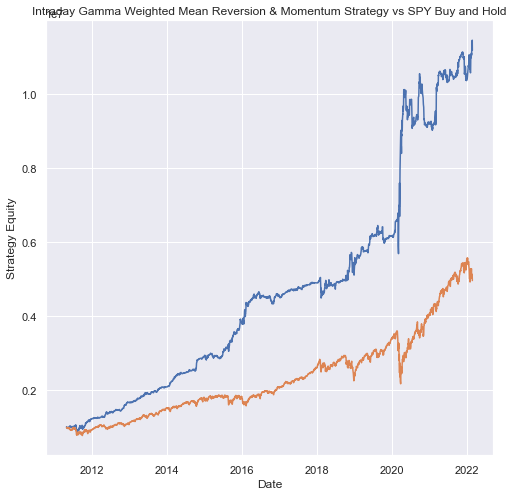

In [10]:
plt.figure(figsize = (8,8))
plt.plot(df['Strategy'])
plt.plot(df['SPY'])
plt.xlabel('Date')
plt.ylabel('Strategy Equity')
plt.title('Intraday Gamma Weighted Mean Reversion & Momentum Strategy vs SPY Buy and Hold')